In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.3.0


## 1- Télechargeons le jeu de donnée

- ce TP se fera sur le jeu de donnée fashion_mnist

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(train_img, train_lbl), (val_img, val_lbl) = fashion_mnist.load_data()

## 2- Exploration de données.
- Explorez le jeu de donnée téléchargé
- Quelques questions "classiques" qu'il est généralement important de regarder sur ce type de dataset
    - quel est le format des labels ? toutes les images sont elles bien labelisées ?
    - combien y-a-t-il d'images ? quel est leur resolution ? sont-elles couleurs ou noir et blanc ? sont-elles toutes de mêmes taille ?
    - combien et quelles sont les classes présentes ? le jeu de donnée est-il équilibré ?
- affichez quelques images de chaque classe pour vous faire une idée du contenu

In [3]:
print("entrainement : ",train_img.shape)
print("validation :", val_img.shape)

entrainement :  (60000, 28, 28)
validation : (10000, 28, 28)


- 60 000 images, chacune de dimension 28*28, en noir et blanc (pas de dimension pour les pixels)
- 10 000 images en validation

In [4]:
print(len((train_lbl)))
print(len(val_lbl))

60000
10000


- on est bon, autant de labels que d'images.

In [5]:
classes = np.unique(val_lbl)
print(classes)

[0 1 2 3 4 5 6 7 8 9]


- on a donc dix classes, codées par des entiers de 0 à 9
- il faut aller chercher dans la documentation de keras le nom des classes. 

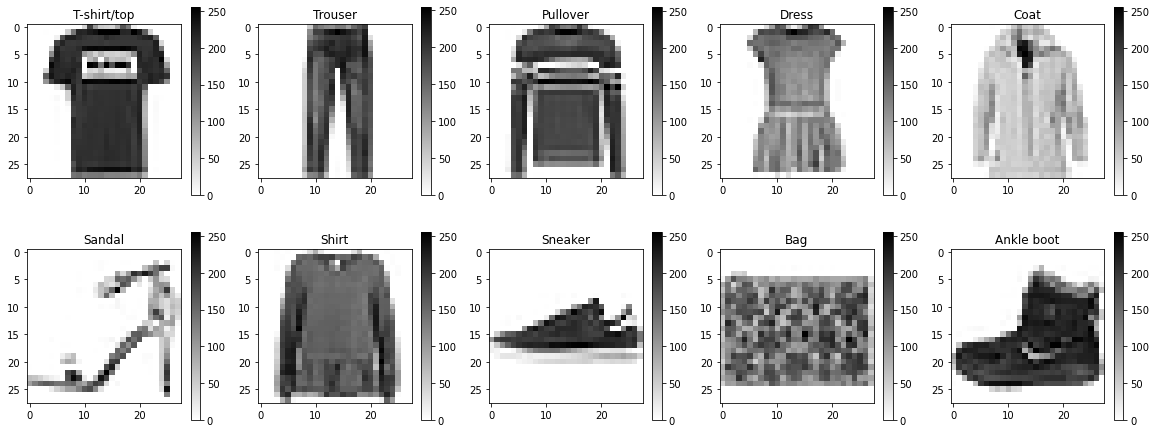

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(20, 20))
for cls in classes:
    plt.subplot(5,5,cls+1)
    cls_sample = train_img[train_lbl==cls][0]
    plt.imshow(cls_sample, cmap=plt.cm.binary)
    plt.colorbar()
    plt.title(class_names[cls])
plt.show()

- images en noirs et blancs codées en uint8 : la valeur de chaque pixel est comprise entre 0 et 255 inclus. 255 veut dire noir, 0 blanc

### 3 - Let's keras it

- Créer un multi-layer perceptron.
    - Rappel: un multi-layer perceptron est un ensemble de plusieurs layers de couches dense
    - Vous pouvez utiliser tf.keras.layers.Dense pour créer une couche dense
    - Vous pouvez utilisez tf.keras.Sequential pour créer un réseau composée d'une suite de layer
    - vous pouvez utiliser tf.keras.layer.Flatten pour "applatir" votre image en vecteur 1D.
    - La documentation est votre amie !
    
- Quelle doit être la taille de la couche d'entrée ?
- Quelle doit être la taille de la couche de sortie ?

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
])

Nous verrons dans la suite du cours ce que sont les paramètres si dessous, tels que l'optimizer.
Ce que fait l'instruction ci-dessous est définir comment entrainer notre réseau : quelle fonction de loss et algorithme de descente de gradient utiliser.

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

- Entrainez ce modele sur 10 epoques sur notre jeu d'entrainement (model.fit(...), puis evaluez sa performance (model.evaluate(...))

In [9]:
model.fit(train_img, train_lbl, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 614us/step - loss: 2.5381 - accuracy: 0.6819
Epoch 2/10
1875/1875 [==============================] - 1s 665us/step - loss: 0.6652 - accuracy: 0.7670
Epoch 3/10
1875/1875 [==============================] - 1s 676us/step - loss: 0.5747 - accuracy: 0.8003
Epoch 4/10
1875/1875 [==============================] - 1s 666us/step - loss: 0.5275 - accuracy: 0.8183
Epoch 5/10
1875/1875 [==============================] - 1s 759us/step - loss: 0.5135 - accuracy: 0.8243
Epoch 6/10
1875/1875 [==============================] - 1s 685us/step - loss: 0.4908 - accuracy: 0.8330
Epoch 7/10
1875/1875 [==============================] - 1s 745us/step - loss: 0.4888 - accuracy: 0.8314
Epoch 8/10
1875/1875 [==============================] - 1s 777us/step - loss: 0.4851 - accuracy: 0.8350
Epoch 9/10
1875/1875 [==============================] - 1s 785us/step - loss: 0.4757 - accuracy: 0.8390
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/

In [10]:
test_loss, test_acc = model.evaluate(val_img,  val_lbl)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 585us/step - loss: 0.5160 - accuracy: 0.8342
Test accuracy: 0.8342000246047974


- Imaginez maintenant que les fausses classifications sont critiques pour le métier. Evaluez le modele précedent (si possible sans le re-entrainer) de façon à faire apparaitre les fausses alertes. Vous pouvez utiliser scikit-learn pour les metriques !
- Difficultée : on est en multi labels !

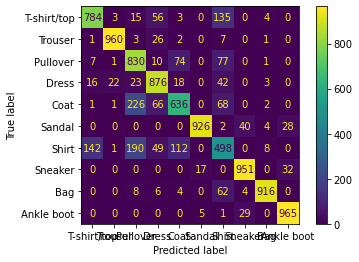

In [11]:
pred = np.argmax(model.predict(val_img), axis=-1) 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(val_lbl, pred)
ConfusionMatrixDisplay(cm, display_labels=class_names).plot()
plt.show()

- keras possedait la méthode predict_classes, mais elle est depreciée, et la "bonne" façon d'obtenir les classes à partir des probabilitées
est argmax(predict(...), axis=-1
- ne pas avoir exactement le bon format de label est un problème récurrent
- un print() des labels est souvent le meilleur moyen de voir le format actuel, et un peu de numpy/comprehension de liste 
peut être plus rapide que de chercher les méthodes de scikit avec un peu d'entrainement